In [17]:
import pyspark 
from pyspark.sql import SparkSession
#from pyspark.sql.functions import *
spark = SparkSession.builder.appName("Project").getOrCreate()

In [18]:
flights = spark.read.csv("flight_data.csv", header=True, inferSchema=True)
flights.show()

+----------+------------------+--------------------+--------------+--------------------+-------------------+-----------------+---------------+--------+---------------+
|Flight No.|       Flight Name|      Origin Airport|Origin Country| Destination Airport|Destination Country|Time of Departure|Time of Arrival|Distance|Date of Journey|
+----------+------------------+--------------------+--------------+--------------------+-------------------+-----------------+---------------+--------+---------------+
|     KG637| American Airlines|Venice Marco Polo...|         Italy|Suvarnabhumi Airport|           Thailand|         05:29 AM|       11:16 AM|    4626|     2022-09-22|
|     OH336|          Emirates|Chicago O'Hare In...|           USA|Vancouver Interna...|             Canada|         11:14 AM|       17:43 PM|    5192|     2024-04-02|
|     RF898|          Emirates|Guangzhou Baiyun ...|         China|Sharjah Internati...|                UAE|         02:18 AM|       11:28 AM|    7338|     2023

In [19]:
from pyspark.sql.functions import col, month, year

# Extract the year and month from the 'Date of Journey' column
flights_with_year_month = flights.withColumn("Journey Year", year(col("Date of Journey"))).withColumn("Journey Month", month(col("Date of Journey")))

# Get distinct years from the dataset
distinct_years = flights_with_year_month.select("Journey Year").distinct().collect()

for year_row in distinct_years:
    target_year = year_row[0]
    print(f"Year: {target_year}")
    
    # Filter flights for the current year
    flights_in_year = flights_with_year_month.filter(col("Journey Year") == target_year)
    
    # Get distinct months within the current year
    distinct_months = flights_in_year.select("Journey Month").distinct().collect()
    
    for month_row in distinct_months:
        target_month = month_row[0]
        
        # Filter flights for the current month
        flights_in_month = flights_in_year.filter(col("Journey Month") == target_month)
        
        # Group by destination airport and count the number of arrivals
        destination_traffic = flights_in_month.groupBy("Destination Airport").count()
        
        # Sort destinations by traffic count in descending order
        sorted_destination_traffic = destination_traffic.orderBy(col("count").desc())
        
        # Show top destinations with the highest traffic count for the current month
        print(f"\nMonth: {target_month}")
        sorted_destination_traffic.show()

# Stop the SparkSession
spark.stop()


Year: 2023

Month: 12
+--------------------+-----+
| Destination Airport|count|
+--------------------+-----+
|Palma de Mallorca...|10881|
|Toronto Pearson I...|10872|
|    Heathrow Airport|10846|
|Cape Town Interna...|10835|
|Suvarnabhumi Airport|10815|
|Gimpo Internation...|10813|
|Kansai Internatio...|10811|
|     Gatwick Airport|10801|
|Domodedovo Intern...|10795|
|      Munich Airport|10789|
|Guadalajara Inter...|10789|
|Charles de Gaulle...|10779|
|Barcelona–El Prat...|10760|
|Sheremetyevo Inte...|10755|
|Vnukovo Internati...|10751|
|Brasília Internat...|10750|
|  Manchester Airport|10747|
|      Sydney Airport|10742|
|Incheon Internati...|10730|
|Ministro Pistarin...|10729|
+--------------------+-----+
only showing top 20 rows


Month: 1
+--------------------+-----+
| Destination Airport|count|
+--------------------+-----+
|Montréal-Pierre E...|10967|
|Vancouver Interna...|10857|
|     Gatwick Airport|10800|
|Guangzhou Baiyun ...|10796|
|Incheon Internati...|10794|
|Beijing Capit

In [14]:
from pyspark.sql.functions import col, month
# Specify the particular month you want to analyze
target_month = 4  # For April, for example

# Filter flights for the particular month
flights_in_month = flights.filter(month(col("Date of Journey")) == target_month)

# Group by destination airport and count the number of arrivals
destination_traffic = flights_in_month.groupBy("Destination Airport").count()

# Sort destinations by traffic count in descending order
sorted_destination_traffic = destination_traffic.orderBy(col("count").desc())

# Show top destinations with the highest traffic count for the specified month
sorted_destination_traffic.show()

# Stop the SparkSession
spark.stop()


+--------------------+-----+
| Destination Airport|count|
+--------------------+-----+
|Cape Town Interna...|20589|
|      Sydney Airport|20583|
|  Düsseldorf Airport|20579|
|Palma de Mallorca...|20534|
|Rio de Janeiro–Ga...|20533|
| Paya Lebar Air Base|20520|
|Ankara Esenboğa A...|20473|
|    Heathrow Airport|20460|
|Barcelona–El Prat...|20430|
|      Munich Airport|20422|
|Chicago O'Hare In...|20413|
|Abu Dhabi Interna...|20403|
|Ministro Pistarin...|20401|
|Adolfo Suárez Mad...|20390|
|      Haneda Airport|20387|
|Aeroparque Jorge ...|20386|
|     Gatwick Airport|20359|
|Shanghai Pudong I...|20347|
|Mexico City Inter...|20345|
|São Paulo–Guarulh...|20343|
+--------------------+-----+
only showing top 20 rows



In [21]:
busiest_origin_airport = flights.groupBy("Origin Airport").count().orderBy(col("count").desc()).limit(3)
busiest_origin_airport.show()


+--------------------+------+
|      Origin Airport| count|
+--------------------+------+
|Chicago O'Hare In...|252413|
|Jeju Internationa...|252371|
|Narita Internatio...|252317|
+--------------------+------+



In [24]:
busiest_dest_airport = flights.groupBy("Destination Airport").count().orderBy(col("count").desc()).limit(3)
busiest_dest_airport.show()


+--------------------+------+
| Destination Airport| count|
+--------------------+------+
|Rio de Janeiro–Ga...|252854|
|    Istanbul Airport|252481|
|Palma de Mallorca...|252427|
+--------------------+------+



In [25]:
dset=flights.limit(10000)
dset.show()

+----------+------------------+--------------------+--------------+--------------------+-------------------+-----------------+---------------+--------+---------------+
|Flight No.|       Flight Name|      Origin Airport|Origin Country| Destination Airport|Destination Country|Time of Departure|Time of Arrival|Distance|Date of Journey|
+----------+------------------+--------------------+--------------+--------------------+-------------------+-----------------+---------------+--------+---------------+
|     KG637| American Airlines|Venice Marco Polo...|         Italy|Suvarnabhumi Airport|           Thailand|         05:29 AM|       11:16 AM|    4626|     2022-09-22|
|     OH336|          Emirates|Chicago O'Hare In...|           USA|Vancouver Interna...|             Canada|         11:14 AM|       17:43 PM|    5192|     2024-04-02|
|     RF898|          Emirates|Guangzhou Baiyun ...|         China|Sharjah Internati...|                UAE|         02:18 AM|       11:28 AM|    7338|     2023

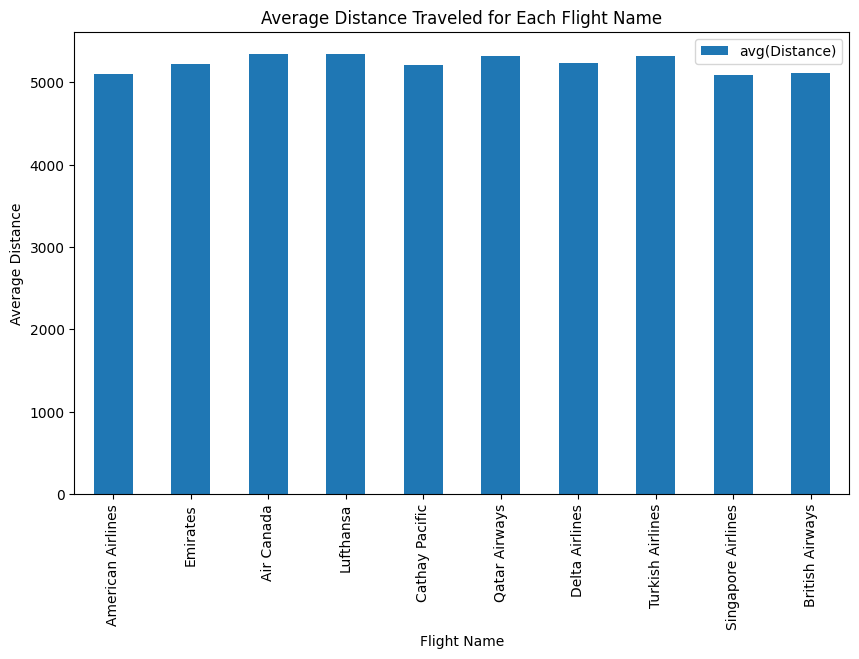

In [27]:
avg_distance_per_flight = dset.groupBy("Flight Name").avg("Distance").toPandas()
avg_distance_per_flight.plot(kind="bar", x="Flight Name", y="avg(Distance)", figsize=(10, 6))
plt.xlabel("Flight Name")
plt.ylabel("Average Distance")
plt.title("Average Distance Traveled for Each Flight Name")
plt.show()
